In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cwd = os.getcwd()

filenames = os.listdir()
print(filenames)
print(cwd)


['.ipynb_checkpoints', '4sig.jpeg', '4sig.png', 'BVP.png', 'BVP_emotions.png', 'cols.m', 'data.npy', 'dataplan.eps', 'dataplan.fig', 'dataplan.ps', 'day1.mat', 'day10.mat', 'day11.mat', 'day12.mat', 'day13.mat', 'day14.mat', 'day15.mat', 'day16.mat', 'day17.mat', 'day18.mat', 'day19.mat', 'day2.mat', 'day20.mat', 'day3.mat', 'day4.mat', 'day5.mat', 'day6.mat', 'day7.mat', 'day8.mat', 'day9.mat', 'display.m', 'EMG.png', 'labels.npy', 'loadall.m', 'makefig.m', 'match.m', 'match2.m', 'match4.m', 'match5.m', 'match6.m', 'pad.m', 'pmatch.m', 'pmatch2.m', 'RESP.png', 'RESP_full.npy', 'rows.m', 'SC.png', 'setA Arange data.ipynb', 'setA load_data.ipynb']
D:\AIproject\emotion recognition\MIT\SetA\MAS622data


{'day1': array([[ 1.6 ,  5.02,  1.55, ..., 42.94, 42.66, 41.87],
       [ 1.55,  4.5 ,  1.5 , ..., 42.91, 42.61, 41.88],
       [ 1.55,  5.95,  1.5 , ..., 42.91, 42.58, 41.91],
       ...,
       [ 1.66,  9.32,  1.97, ..., 41.25, 42.91, 42.43],
       [ 1.66,  9.68,  1.97, ..., 41.15, 42.92, 42.52],
       [ 1.66,  8.85,  1.92, ..., 41.16, 42.92, 42.6 ]])}
Kích thước dữ liệu của 1 file: (2001, 32)


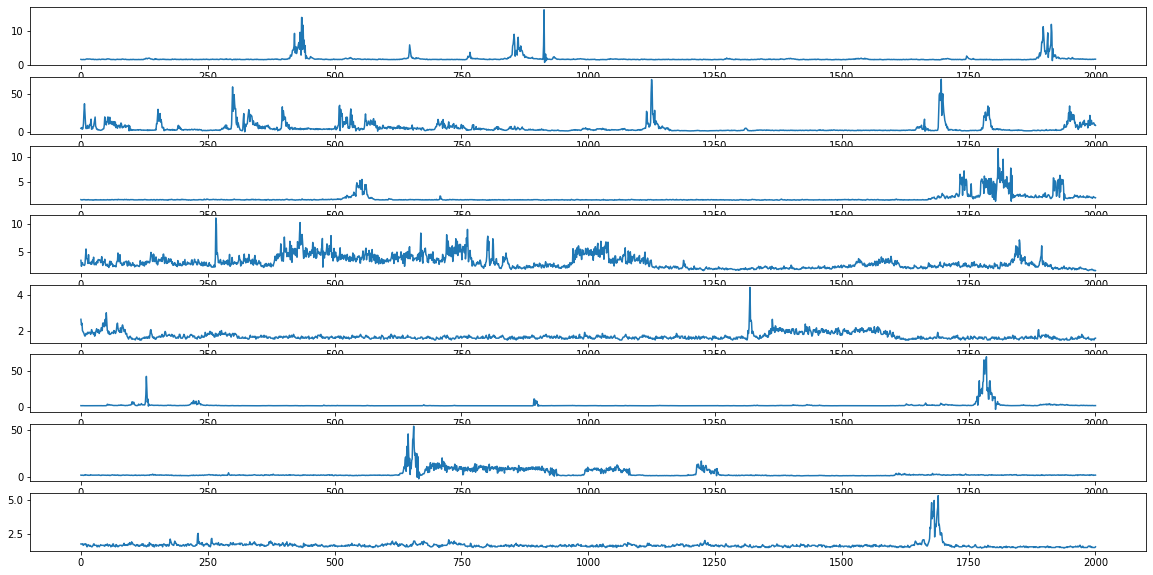

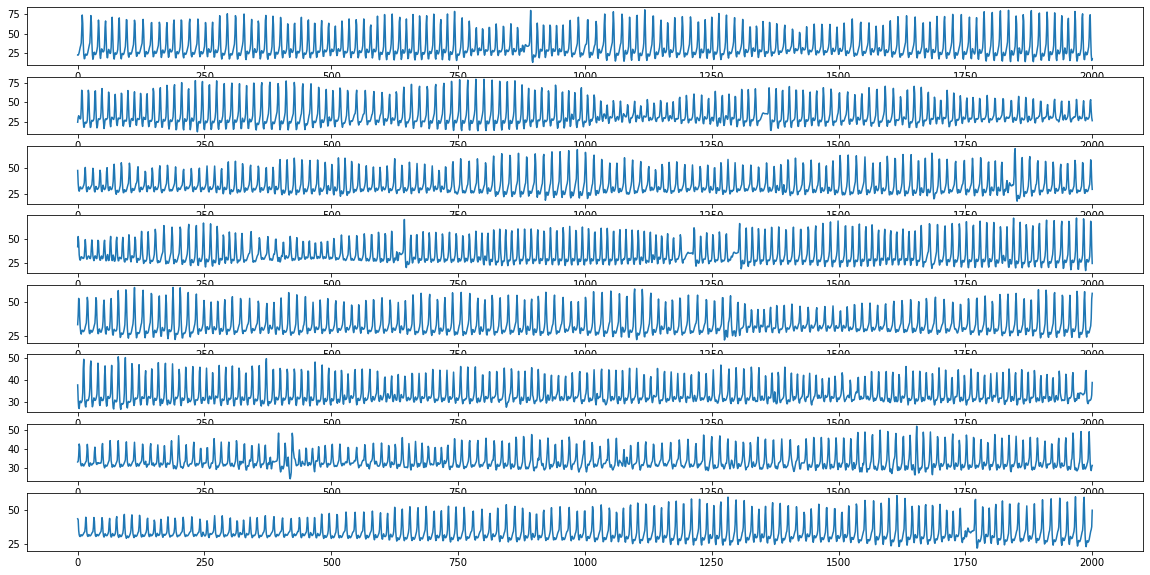

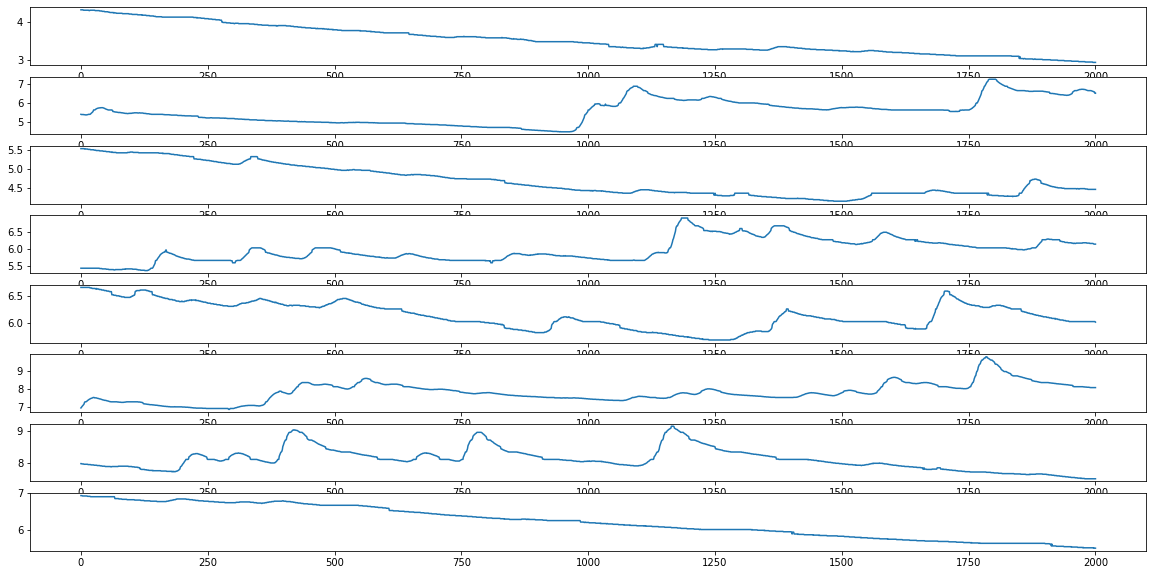

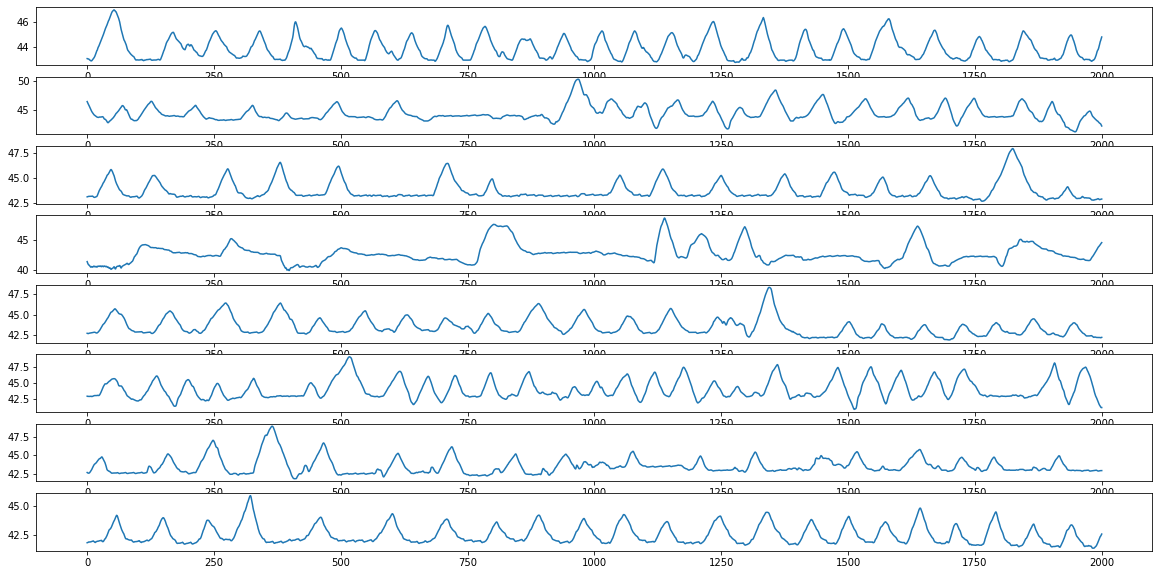

In [2]:
example = scipy.io.loadmat("day1.mat")
print(example)
data = example['day1']
print("Kích thước dữ liệu của 1 file:", data.shape)

fig, ax = plt.subplots(8, 1, figsize = (20, 10))
for i in range(8):
    ax[i].plot(data[:, i])
plt.show()

fig, ax = plt.subplots(8, 1, figsize = (20, 10))
for i, j in enumerate(range(8, 16)):
    ax[i].plot(data[:, j])
plt.show()
fig, ax = plt.subplots(8, 1, figsize = (20, 10))
for i, j in enumerate(range(16, 24)):
    ax[i].plot(data[:, j])
plt.show()
fig, ax = plt.subplots(8, 1, figsize = (20, 10))
for i, j in enumerate(range(24, 32)):
    ax[i].plot(data[:, j])
plt.show()

In [3]:
x = list(example.values())
print(np.squeeze(x).shape)

(2001, 32)


In [4]:
def arange_data(day):
    data = np.squeeze(list(day.values()))
    d = np.ndarray((4, 2001, 8))
    for j,i in enumerate(range(0, 32, 8)):
        cut = data[:, i:i+8]
        d[j] = cut
    d = np.transpose(d, (2, 0, 1))

    return d

# d = arange_data(example)
# print(d.shape)
# for i in range(4):
#     plt.plot(d[0,i,:])
#     plt.show()

In [5]:

days = []
for i in range(1,21):
    days.append(scipy.io.loadmat("day" + str(i) + ".mat"))


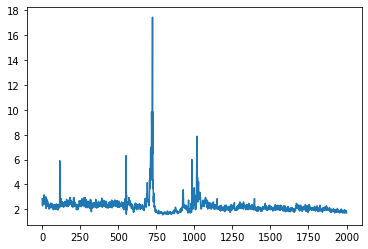

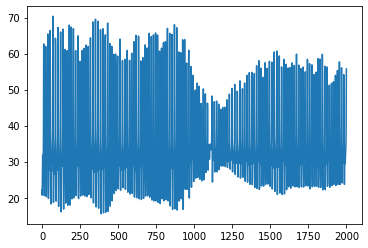

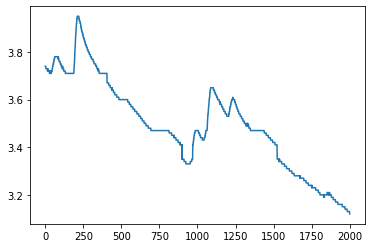

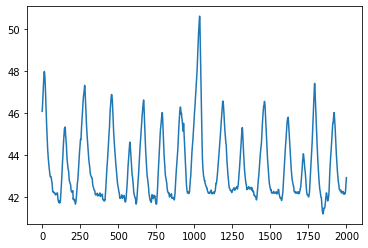

In [6]:
data_list = []
for day in days:
    data = arange_data(day)
    data_list.append(data)
    
    
data_full = np.array(data_list).reshape(160, 4, 2001)
for i in range(4):
    plt.plot(data_full[20, i, :])
    plt.show()

In [71]:
RESP = data_full[:, 3,:]
np.save("RESP_full.npy", RESP)